# Data Dashboard for Movies sells

## Installing packages

In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Obtaining data from https://www.boxofficemojo.com/weekly/2020W38/?ref_=bo_wly_table_15

In [26]:
#Reading excel file of the gross movie sales of boxofficemojo from 18 to 24 of September of 2020
df = pd.read_excel (r'/content/drive/MyDrive/DSBA_6276/BoxOfficeMojo-Week-Sept._18-24,2020.xlsx')
print(df)

    Rank  LW  ... Weeks                 Distributor
0      1   -  ...     4                Warner Bros.
1      2   2  ...     4        20th Century Studios
2      3   -  ...     1    Cloudburst Entertainment
3      4   3  ...     6            Solstice Studios
4      5   4  ...     2            TriStar Pictures
5      6   5  ...     4    United Artists Releasing
6      7   7  ...     6          Paramount Pictures
7      8   8  ...     4        Searchlight Pictures
8      9   6  ...     5        Roadside Attractions
9     10   -  ...     1           Magnolia Pictures
10    11  15  ...     2       Bleecker Street Media
11    12   -  ...     1      Vertical Entertainment
12    13   9  ...     7   Well Go USA Entertainment
13    14   -  ...     1                   IFC Films
14    15  13  ...     5         Pryor Entertainment
15    16  10  ...     5   Well Go USA Entertainment
16    17  12  ...     8                        Neon
17    18   -  ...     1              Focus Features
18    19  18

## Building the Dashboard 

### Building individual plots



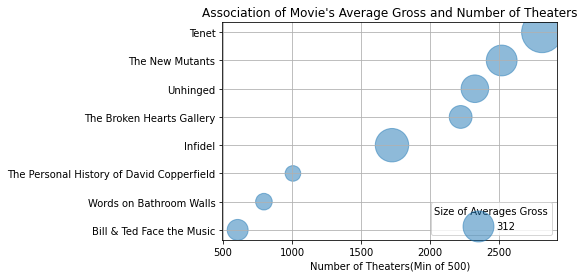

In [93]:
## plot to show association in movies that are shown with a min of 500 theaters and its gross averages
fig, ax = plt.subplots()

df = df.sort_values('Theaters')
movies_in_500 = df[df['Theaters'] > 500]
ax.scatter(movies_in_500['Theaters'],movies_in_500['Release'],s=movies_in_500['Average'],alpha =.5)

ax.set_xlabel('Number of Theaters(Min of 500)')
ax.set_title('Association of Movie\'s Average Gross and Number of Theaters')
ax.grid(True)
ax.legend(df['Average'],loc = 'lower right',title='Size of Averages Gross',numpoints =4)

    Rank  LW  ... Weeks                Distributor
18    19  18  ...     7                 RLJE Films
12    13   9  ...     7  Well Go USA Entertainment
20    21  16  ...     9                  IFC Films
7      8   8  ...     4       Searchlight Pictures
2      3   -  ...     1   Cloudburst Entertainment
8      9   6  ...     5       Roadside Attractions
4      5   4  ...     2           TriStar Pictures
5      6   5  ...     4   United Artists Releasing
6      7   7  ...     6         Paramount Pictures
3      4   3  ...     6           Solstice Studios
1      2   2  ...     4       20th Century Studios
0      1   -  ...     4               Warner Bros.

[12 rows x 11 columns]


AttributeError: ignored

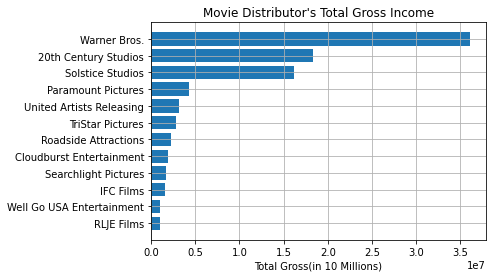

In [130]:
## plot to show the sum of gross income by distributor
fig1 = plt.subplot()
df = df.sort_values('Total Gross')
movie_with_more_500k = df[df["Total Gross"] > 1000000]
print(movie_with_more_500k)
fig1.barh(movie_with_more_500k['Distributor'], movie_with_more_500k['Total Gross'])

fig1.set_xlabel('Total Gross(in 10 Millions)')
fig1.set_title('Movie Distributor\'s Total Gross Income')
fig1.grid(True)
fig1.xticks(np.arange(0, 4, step=1))

Text(0.5, 1.0, "Movie's Total Gross Income")

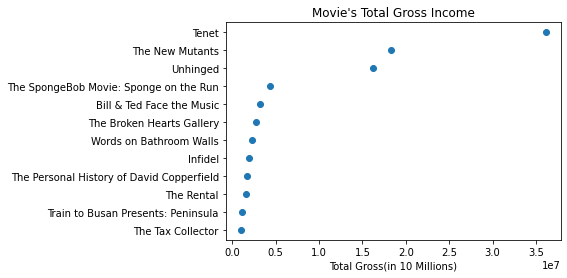

In [143]:
fig2 = plt.subplot()

fig2.scatter(movie_with_more_500k['Total Gross'],movie_with_more_500k['Release'])
fig2.set_xlabel('Total Gross(in 10 Millions)')
fig2.set_title('Movie\'s Total Gross Income')

### Building dashboard

In [144]:
## Creating Dashbaord function

def create_figure():
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax = fig.add_subplot(specs[0, :]) ## First Row
        fig1 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        fig2 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        ##Importing Data
        df = pd.read_excel (r'/content/drive/MyDrive/DSBA_6276/BoxOfficeMojo-Week-Sept._18-24,2020.xlsx')
        
        ## Building First Plot
        movies_in_500 = df[df['Theaters'] > 500]
        movies_in_500 = movies_in_500.sort_values('Theaters')

        ax.scatter(movies_in_500['Theaters'],movies_in_500['Release'],s=movies_in_500['Average'],alpha =.5)
        ax.set_xlabel('Number of Theaters(Min of 500)')
        ax.set_title('Association of Movie\'s Average Gross and Number of Theaters')
        ax.grid(True)
        ax.legend(df['Average'],loc = 'lower right',title='Size of Averages Gross',numpoints =4)

        ## Building Second Plot
        df = df.sort_values('Total Gross')
        movie_with_more_500k = df[df["Total Gross"] > 1000000]    
        
        fig1.barh(movie_with_more_500k['Distributor'], movie_with_more_500k['Total Gross'])
        fig1.set_xlabel('Total Gross(in 10 Millions)')
        fig1.set_title('Movie Distributor\'s Total Gross Income')
        fig1.grid(True)

        ## Building Thrid Plot
        fig2.scatter(movie_with_more_500k['Total Gross'],movie_with_more_500k['Release'])
        fig2.set_xlabel('Total Gross(in 10 Millions)')
        fig2.set_title('Movie\'s Total Gross Income')

        plt.close(fig)
        return fig

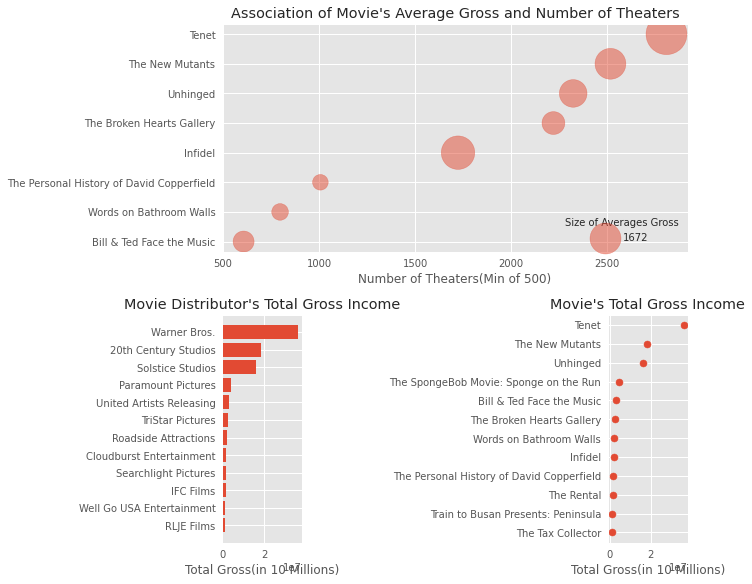

In [145]:
create_figure()